In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [2]:
# 5.2.3 File to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read the city file and store in a pandas Dataframes
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride file and store in a pandas Dataframes
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# 5.2.4 inspect data
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get data types for each columns. make sure driver_count is a numerical data!
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
types = city_data_df['type'].unique()

In [9]:
# Get the number of data points for each type
for i in types:
    type_count = sum(city_data_df['type']==i)
    print(f"{i}:{type_count}")

Urban:66
Suburban:36
Rural:18


In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column. make sure fare and ride_id are numerical data type
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# merge two Dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])

In [14]:
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [19]:
# 5.3.2 Create the Urban, Suburban and Ruralcity DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [24]:
# Get the number of rides for each city.
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']

In [26]:
# 5.3.3 Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare = rural_cities_df.groupby('city').mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
# 5.3.4 Get the Average Number of Drivers for Each City Type
urban_drive_count = urban_cities_df.groupby('city').mean()['driver_count']
suburban_drive_count = suburban_cities_df.groupby('city').mean()['driver_count']
rural_drive_count = rural_cities_df.groupby('city').mean()['driver_count']
urban_drive_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

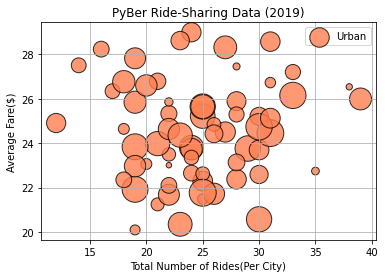

In [39]:
# 5.3.5 Create a scatter plot for each type of city
# Urban
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s = 10*urban_drive_count,
           c = 'coral', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid(True)

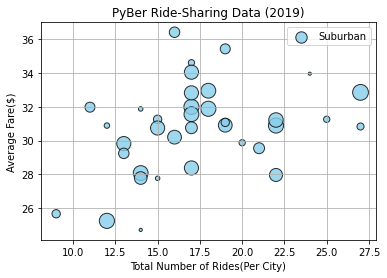

In [43]:
# Suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s = 10*suburban_drive_count,
           c = 'skyblue', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid(True)

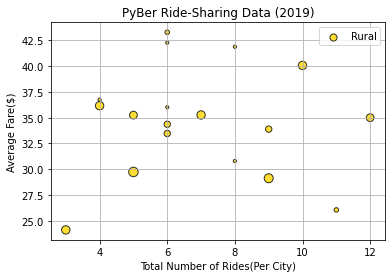

In [91]:
# Rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s = 10*rural_drive_count,
           c = 'gold', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid(True)

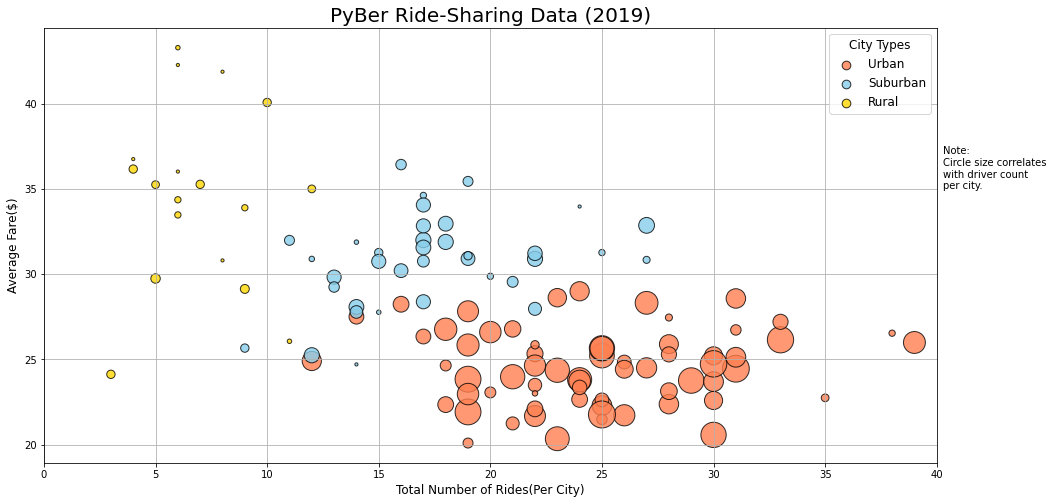

In [111]:
# 5.3.6 Combine

plt.figure(figsize=(16,8))
# Urban
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s = 10*urban_drive_count,
           c = 'coral', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Urban')
# Suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s = 10*suburban_drive_count,
           c = 'skyblue', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Suburban')
# Rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s = 10*rural_drive_count,
           c = 'gold', edgecolor='black',
           linewidths=1,alpha = 0.8,
           label = 'Rural')


plt.title('PyBer Ride-Sharing Data (2019)',fontsize= 20)
plt.xlabel('Total Number of Rides(Per City)',fontsize= 12)
plt.ylabel('Average Fare($)',fontsize= 12)
plt.grid(True)
plt.xlim(0,40)

# Modify the legend
lgnd = plt.legend(fontsize='12', mode = 'Expanded', 
                   scatterpoints=1, loc='best', title='City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size. Make a note!
note = ('Note:\nCircle size correlates \nwith driver count\nper city.')
plt.text(40.3,35,note)

# Save the figure.
plt.savefig("analysis/Fig1.png")